In [1]:
import requests
import json
import base64
import numpy as np
from PIL import Image
import urllib
from io import BytesIO
import cv2
from object_detection.utils import visualization_utils as vis_util
from object_detection.utils import label_map_util

In [2]:
# !pip install opencv-python

In [3]:
PATH_TO_LABELS = '../data/oid_bbox_trainable_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [8]:
# image = cv2.imread("../data/test_images/Brown-bear-Finland.jpg").astype(np.uint8)[:,:,::-1]
import pylab
# url='https://africafreak.com/wp-content/uploads/2019/09/sub-adult-male-lion.jpg' # Does not detect the lion
# url="https://www.sciencemag.org/sites/default/files/styles/article_main_image_-_1280w__no_aspect_/public/bears_16x9.jpg" # Detects the bears

# Camera trap images
# url = "https://cdn.shopify.com/s/files/1/1065/8354/files/180_Ray_Belize_full_large.jpg"
# url = "https://hc8fm03jtw-flywheel.netdna-ssl.com/wp-content/uploads/2019/01/Camera-trap-3-China.jpg"
# Fox gets classified as a carnivore
url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUTEhIVFRUXFRcXGBcXFRcVFRoXGhcXFxcXFxUYHSggGholHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKBQUFDgUFDisZExkrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrK//AABEIAMIBAwMBIgACEQEDEQH/xAAcAAADAQEBAQEBAAAAAAAAAAAAAQIDBAcGBQj/xABGEAACAQIDBAYGCAMFCAMAAAAAAQIDEQQSIQUxQVEHEyJhcfCBkZOxwdMGFzJkodHS4RRCYiNjcnPxM0NEU4OissMVFiT/xAAUAQEAAAAAAAAAAAAAAAAAAAAA/8QAFBEBAAAAAAAAAAAAAAAAAAAAAP/aAAwDAQACEQMRAD8A8oC4rgAwFcAGhwjd2JNaHHwAT1FccRPkAoscQSKSVgBCtxKTEBKRMolyZLfqAmMV6OJlM6HqjCTA2pVdLf6Lz8C3a6ONmrrad4Gs49q3C1/LNFDW5z4eV5JX88j9Hqr+jz8APzqy99vSiZTdt52V6T4Lfv8APM56tPS4Gea619f5oVtdSC4S4cALivPcNKy18+dCUtea4riiZp3sBV+SCTsTF2CTuAMTCI5IBCGACGIYGlwuIEABcYWAaNsP8DnTN8Ou154ATSWvcvgOS3iUrNeOpVbRv0e4BRJkZuRUEBopaDy8AhHRruv6n+Vyrb/HUCZJat7tPXy/Azbv3Iqcr+BmApy5GbALgBLKuJgEZWdzqhjmlZq+/U4xpAbxxLvd+eA5Yi8bW187jHIJoBFRJAC3v0NZ66+v8yIvn4lLinxugMwG0SwGVwINIvgBDEAMAAQAaMaEwAoGTcGwBHThF2l53HMjrwC7S8+IGVTe/EvFLSL/AKUTXfafiXX3d2lvUBzoqJEWaQfEDSEu0vFL4GmLVrLnqzOirteKNK1S8nyuBjY55yN60+Jy8QASReUMoGY2xMcUA4xuaxgUqdkKQCExMSYEsLDuADQ78GSIDapG709Rk4sbYk2AjSG8WYYENCKZLYAAgA0aC4gAbCwMQFpnVgV2zjO3CvS+5JAY1d78WFd6JekqOrVudvy89xliZ3k/V6gM0ze3DjxM6K1/H1IcOfoA6cP9r3mMnf3nTFWptvfLRHOpWAxqvgZmtZ3d7WuZMBgCTGwMjSk9RNG1GIFSZEmOo0mTfQCWFgYRAmQRCS1GAMIoTLi9ABITDMCsBKLuZsEwKkyCnuIuAxCADQBDuA2IchWApHfZKmrcVr4bzgSR3YvRRXcBlhpWUny9+qOVnRFdiXoRzgbUVv8AD4o1pwzNK3EyjpF+KXv/ACOnDPLCU+P2Y+L3gTjqibSX2UrL4syfDuC10vPP8iXLUCC47iYyu9TRx5gOy3ClSQ8pN2BllsCk0VYaiBCjzKVtfNylAiryQEyE5CZIFRCw7CuAmMTZNwLQrhxJkBWYlsVwAtbiEUiAGILgBoDBsTYFAIEwLhvXijsx/wBpf4fPwOXCxvKPibY2pecvPABT0p+MvPvMIc+XlGtd9iPJXRk9yQFcEub/AGXxOnHSs1TW6K/7nvY8BBaVHugm34717zllNyd3vbuBpHRej9zKMjSo9NOBhcDXKjRO5jmuXCVt4Gy5FOOhnB6mikBnoNozV3c1i7Jtvdu8WBM3bRekhiJbAVRGRbkQwHcVwBAVCBbpodiJMBNEyQSYwJyg0UJMB3JaBIYCALgA2AuAANiQMEB2bN+03yRlVndt9xrhGlGT7jliwOrfSS/r+BzvU6KX+yl3NP16GOGhmklzYHVi3lhCHNZn8Dkp7zXH1LzfJaLwWhlTA0l/N6PyMUbPj32MkgBGq5r0n0v0Y+hNTG0J1adSMZRk4xhJPttRUn2r6faS3M+frYWdObhOMozi8ri1qnysAkSn6D6/EfQOtTwcsVVkoNRzdS4vNluk8z/let7anyMogVe24mruXhf1ibIrPXwVgICTJE2A7ksBAMcCQiwNKjIgxDQFPmJktMdgBPQJEtj3gK5TJBsBgTcQGgANAGUpQBIdgNF9i3MxsapMpR7gLwn2ai/pDBtJt8lp4kpFJeAHPYqK0fq8/gbxpn61HYM3FSk8q4Kzcn6OHAD8OxSgfaYT6NU8ictX6S//AK5Te6LXhdAfsdEdb+zrU9ezOM1yV45X/wCJ93W2HhalVV50oSqpxedpXvHd6j4z6G7L6hzeuWVtX3X5H2v/AM1Tk3UUI5U12eDypX9zA/D6Sa7hgqurvPJTVuTmm78tE/WeKNWPVuk7aUalDsWUZ1IvKtdybsjy6UQOZkSR0OBDiBzuJLR0OIKmBzWFY6JQIcQMWhWNXEVgM2XFhYTQDbFJlNXXgRYCWBpT37iJASgkwEAAPKAGgwGgGhpAi4oASKSGkaKL5AJI0p0rtJb2KMOFj9jCUY0lmku1b1Admytnwp2lKzlz5H69OspSjHeo/HcfK4jaTnov2X5nf9F325p63SfvA+tjHRnVh6fYb4uxz7o34bjoo1k9PSB+5gGowt3H5dfBR6yM72y5rLud7+9+s0qYiySTI61KKvxd/wBwPwukBw6ilFJK0tF3Wsz4KUT9Xbu0ZYis5N9lPLBcLLj6T8+3mwGOR8iMncdKXiTN94HPkJaNsveKdNrn6rAYOIpI2ykyS7wOdwJcToyEun3gYNEtG8okzXnmBipDylKBSsBhlZMom8txDQGSQxtktgTcYgA2RSJQ0BaLiiEaRA0jE0VyII1UQOzBTjG943fBpq/4mdS8n2m7crkQNUkA1TS3X9R2bKllqJ+KOZHXs6yneW5JsD6DG45zq0qUfsxjmn42svPei3iIxrwpx3tNz13K2itz4n5WzsSozq1JLhdeHL3GGy5tVHUlvs233uwH7+Mx6VWEN7k/UuLfuOL6Q4ycY5c1nNW04QW9Lvd0vWfmxxDniIz/AKl6l+9xbWr9ZVb1sllXv+KA/M6tAlyNuq7h9Xbh6AMZxflkSps3yW/cJRd91+b4/iBhGm33eIupOgVgOVxtwFd+bnROK539ZnYDncUTKGvcdNuViZwA5JU+SdiXHz8Deyb3dwsTScW1a1tHey1QHMS2+ZTIk/NgFC11m3X1fcOtScJ5XwfrXPwIZqqzcVF8NE+NuVwOQR01MO09zs91/iY1I8r258wMxgAGyGhDQFpFxM1cpMDeJvA56cjamBtFGisZpLezSMUBpFFOWVSfc160TB9xtGK4/mAsNVbjeO+zT9KJoV5KMs0WtLdzOmMVw/IyxWHco2TswCnUtFPkhUJLLfxf4hToPK4t37zTAYaMHqr+MrL1ANysu+5m6snuW7f+FhSV5NJWt5srm9Pc1fla/nT9wMcrdnLtdy3+40nKFlG1nd82150JhFXSt7xVKS3p27rgOnFK6MasNdxdPTe0VN62fu+IHPpoU4LkvwHWjxtZ92gJvc9/Lz4gZ1dHuv8A6c7nNfW298lrqdcqE3xVr66u9u7TQ6qajF/ZS37l6APy8Eu3DulFvwTu/wADOs72berV7dz4s7HRUZPVZUpeNmrWXf2mccpXbfF+Ul3JWA5pESR0SRjNAYtDpmuXS+8yc7Pd3AFaemiSu/S+foMJSvvLmJw0XpAgDR0u9AB6HLod2kr3lhFbfevJWvuv/Z6Fx6Gtqb08N7afyz7z6c/QnGYrGVcRScHSUMLJYebXV4mdGrKTp1eUFGUtGrNyXI6quy9tSxVecK/Vwkqzo3yujGMqGWhTlDrHacKrTclTd8t80k8qDzp9DW1eeG9tP5ZnU6H9pRaUp4SOZ2V68ld8lenqz7f+E2tShRVWeJmqmKhF04VLVMiw9brX1/WzyxnPq2ryjZx0yXssdp/Q7aVSMZV6NDF154OjSVSp1U1QrU5TlK8KsWpQkpRzSh2m09LO4Hy0eh3an3b20vllx6H9p/dvbT+WekSwe1lWaXagqsqin16jCUXgerjSUMrcY/xCzaxssyaT1PzNl7B2xLLCtXrQpSrYaUrYi9WNNUcRHEw6zPJ6zdD7Mu+Ki9EHxX1R7TWmbDXe5ddK/f8A7vvNPqk2p92XhWn8s9E2DsTGraEa+JzyjBYyOeVaM4NVatKVHqqW+mlTgotc437390B4RS6J9opf8P7WX6Cvqo2j/ce1l+g91ADwyPRXtLnQ9tJ/+s0j0W7RX/IfjVl+g9vADxN9GO0fu/tJe/IRLov2jbRYe/8AmS9dsh7eAHh1Lopx/wDN1D/6kv0mq6Lcfx6n0VH8YHtgAeIw6LdoLjQ9pL9BqujHH/3HtH+g9pADxOXRdj/7j2j/AEGcuivaF006HtJfoPcAA8P+q3aPHqPay/QQ+iraN7r+H9rL9B7mfE7SwOOeIxDoKpFzzpVJVWqSpShhYrqodpKrFxruN4aSUm9J3kHwH1VbS50Pay/QW+iraFl/sL8f7WX4dg9GcMYtn01OEpT6mgnThKcazmurzKde91G987SzZc1ru1+HYWz8dDFK86koRoqCqVc7jK1HDLM4urfWca1oNOaeaTm1KzD4Op0TbR4Ohf8AzJW3f4Djl0O7T4PD+1l8s9L2zgsXPETlHrkoqkpZZVFTqw62jKtClDNlglShUSb7cp1JJOKXa3w+ExCgusjiHD+HqRcYVJdYouunTV89+tjRdm08zyuzvYDyl9Du1fu3tp/LE+hzav3X20/lnuf0Yp1Y4WlGtmzqLTzNuX2nZ9puS0tpJtrc22mz5vauCxbxNZxWJUXNdunUvHqLYNZacOtjaSlGu9LNJVN+dKQeY/U5tS1v/wA3tp/LI+pnan3b20/lnr9ahi5YOCcaqqZcI6kVNXcVXjLEwi87nndJTT7TTukm3dn5n0fwWOjiL1I11TVGcYp1M0srp0erUpyqOLqJqcbOLeZSm52llA8w+pXanPDe1l8sa6GNq88N7Wfyz1vbOGxUq9TJ/E5JU1FuMrKMcsLypZa0U6l3O+ifZdv5b/QbBVRYemqqanZ3Tbct7tmblJ5rWbV3Z3A8D+pbavPC+1l8sR/RoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB//9k="
# url = "https://bp0.blogger.com/_UV9jSNGDpqU/RwkEX2myc1I/AAAAAAAAA2E/n_VggElZJF8/s400/Possum+3648.jpg" # Possum got detected as animal and mouse
data = BytesIO(urllib.request.urlopen(url).read())
image = pylab.imread(data, format='jpg').astype(np.uint8)
payload = {"instances": [image.tolist()]}

res = requests.post("http://localhost:8501/v1/models/camera_trap_object_detection:predict", json=payload)
output_dict = res.json()['predictions'][0]

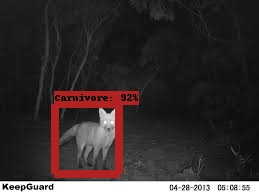

Carnivore 0.93


In [7]:
vis_util.visualize_boxes_and_labels_on_image_array(
  image,
  np.array(output_dict['detection_boxes']),
  np.array(output_dict['detection_classes']).astype('int'),
  np.array(output_dict['detection_scores']),
  category_index,
  instance_masks=output_dict.get('detection_masks_reframed', None),
  use_normalized_coordinates=True,
  line_thickness=8)

display(Image.fromarray(image))

for i in range(int(output_dict['num_detections'])):
    print(f"{category_index[output_dict['detection_classes'][i]]['name']} {output_dict['detection_scores'][i]:.2f}")